## Recap

In [20]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('dc_airbnb_train.csv')
test_df = pd.read_csv('dc_airbnb_test.csv')

train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2792 entries, 0 to 2791
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       2792 non-null   float64
 1   bedrooms           2792 non-null   float64
 2   bathrooms          2792 non-null   float64
 3   beds               2792 non-null   float64
 4   price              2792 non-null   float64
 5   minimum_nights     2792 non-null   float64
 6   maximum_nights     2792 non-null   float64
 7   number_of_reviews  2792 non-null   float64
dtypes: float64(8)
memory usage: 174.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879 entries, 0 to 878
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       879 non-null    float64
 1   bedrooms           879 non-null    float64
 2   bathrooms          879 non-null    float64
 3   beds               879 

## Hyperparameter optimization

The process of finding the optimal hyperparameter value is known as `hyperparameter optimization`. A simple but common hyperparameter optimization technique is known as `grid search`, which involves:

- selecting a subset of the possible hyperparameter values,
- training a model using each of these hyperparameter values,
- evaluating each model's performance,
- selecting the hyperparameter value that resulted in the lowest error value.

In [5]:
hyper_params = range(1,6)
mse_values = []
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
for param in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=param, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse_values.append(mean_squared_error(test_df['price'], predictions))

print(mse_values)

[26364.92832764505, 15100.52246871445, 14579.597901655923, 16212.300767918088, 14090.011649601822]


## Expanding grid search

In [6]:
hyper_params = range(1,21)
mse_values = []
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
for param in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=param, algorithm='brute')
    knn.fit(train_df[features], train_df['price'])
    predictions = knn.predict(test_df[features])
    mse_values.append(mean_squared_error(test_df['price'], predictions))

print(mse_values)

[26364.92832764505, 15100.52246871445, 14579.597901655923, 16212.300767918088, 14090.011649601822, 13657.290671217292, 14288.273896589353, 14853.448183304892, 14670.831907751512, 14642.451478953355, 14734.071380889252, 14854.556669510808, 14733.16190399257, 14777.975894453346, 14771.124646694478, 14870.178509847838, 14832.598509630716, 14783.592968300116, 14775.594716988267, 14676.947986348125]


## Visualizing hyperparameter values

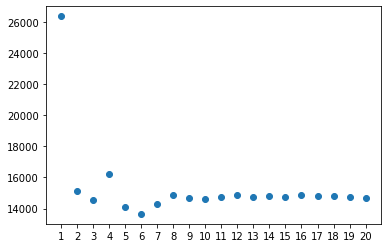

In [10]:
plt.scatter(hyper_params, mse_values)
plt.xticks(hyper_params)
plt.show()

## Varying Hyperparameters

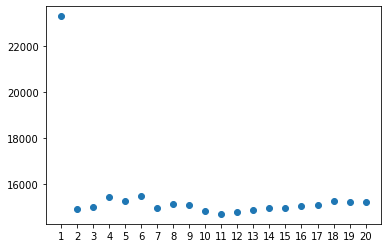

In [12]:
hyper_params = range(1,21)
mse_values = []
train_x = train_df.drop('price', axis=1)
train_y = train_df['price']

test_x = test_df.drop('price', axis=1)
test_y = test_df['price']

for param in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=param, algorithm='brute')
    knn.fit(train_x, train_y)
    predictions = knn.predict(test_x)
    mse_values.append(mean_squared_error(test_y, predictions))

plt.scatter(hyper_params, mse_values)
plt.xticks(hyper_params)
plt.show()

In [14]:
min(mse_values)

14711.46334583815

## Practice the workflow

the general workflow for finding the best model is:

- select relevant features to use for predicting the target column.
- use grid search to find the optimal hyperparameter value for the selected features.
- evaluate the model's accuracy and repeat the process.

In [27]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']

hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()

In [28]:
for param in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=param, algorithm='brute')
    knn.fit(train_df[two_features], train_df['price'])
    predictions = knn.predict(test_df[two_features])
    two_mse_values.append(mean_squared_error(test_df['price'], predictions))

In [29]:
two_hyp_mse[np.array(two_mse_values).argmin()+1] = min(two_mse_values)

In [30]:
for param in hyper_params:
    knn = KNeighborsRegressor(n_neighbors=param, algorithm='brute')
    knn.fit(train_df[three_features], train_df['price'])
    predictions = knn.predict(test_df[three_features])
    three_mse_values.append(mean_squared_error(test_df['price'], predictions))

In [31]:
three_hyp_mse[np.array(three_mse_values).argmin()+1] = min(three_mse_values)

In [32]:
print(two_hyp_mse)
print(three_hyp_mse)

{5: 14790.314266211606}
{7: 13518.769009310208}
